<a href="https://colab.research.google.com/github/Faizaa01/Machine_Learning_Fundamentals/blob/main/KNN_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

np.random.seed(42)

In [6]:
wine = load_wine()
X = wine.data
y = wine.target

print("Dataset shape: ", X.shape)
print("Classes: ", list(wine.target_names))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

clf = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2))
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Dataset shape:  (178, 13)
Classes:  [np.str_('class_0'), np.str_('class_1'), np.str_('class_2')]
Accuracy:  0.9333333333333333
Confusion matrix: 
 [[15  0  0]
 [ 0 16  2]
 [ 0  1 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.89      0.91        18
           2       0.85      0.92      0.88        12

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



Best K:  15
Best_accuracy:  1.0


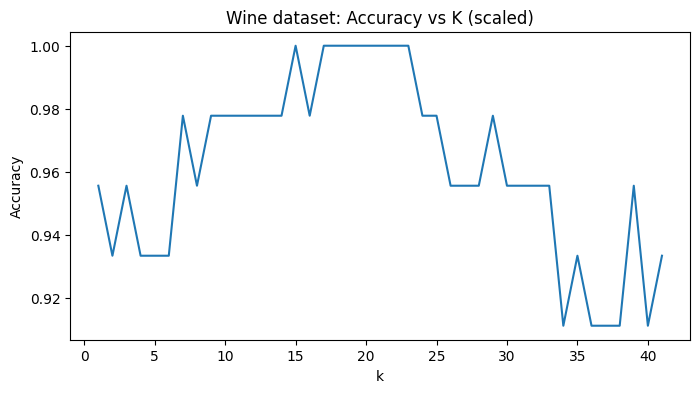

In [8]:
k_values = range(1,42)
accs = []
for k in k_values:
  model = Pipeline([
      ("scaler", StandardScaler()),
      ("knn", KNeighborsClassifier(n_neighbors=k))
  ])
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accs.append(accuracy_score(y_test, y_pred))

best_k =list(k_values)[int(np.argmax(accs))]
print("Best K: ", best_k)
print("Best_accuracy: ", float(np.max(accs)))

plt.figure(figsize=(8,4))
plt.plot(list(k_values), accs)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Wine dataset: Accuracy vs K (scaled)")
plt.show()

In [10]:
k_demo = best_k

settings = [
    ("Euclidean (p=2), uniform", KNeighborsClassifier(n_neighbors=k_demo, metric="minkowski", p=2, weights="uniform")),
    ("Euclidean(p=2), distance", KNeighborsClassifier(n_neighbors=k_demo, metric="minkowski", p=2, weights="distance")),
    ("Manhattan (p=1), uniform", KNeighborsClassifier(n_neighbors=k_demo, metric="minkowski", p=1, weights="uniform")),
]

rows=[]
for name, knn in settings:
  model = Pipeline([("scaler", StandardScaler()), ("knn", knn)])
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rows.append([name, accuracy_score(y_test, y_pred)])

pd.DataFrame(rows, columns=["Settings", "Accuracy"]).sort_values(by="Accuracy", ascending=False)

,Settings,Accuracy
0,"Euclidean (p=2), uniform",1.000000
2,"Euclidean(p=2), distance",1.000000
1,"Manhattan (p=1), uniform",0.977778


In [11]:
knn_no_scale = KNeighborsClassifier(n_neighbors=k_demo)
knn_no_scale.fit(X_train, y_train)

pred_no_scale = knn_no_scale.predict(X_test)
acc_no_scale = accuracy_score(y_test, pred_no_scale)

pred_scaled = clf.predict(X_test)
acc_scaled = accuracy_score(y_test, pred_scaled)

print("Accuracy without scaling: ", acc_no_scale)
print("Accuracy with scaling: ", acc_scaled)

Accuracy without scaling:  0.7777777777777778
Accuracy with scaling:  0.9333333333333333


In [15]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("Dataset shape: ", X.shape)
y.value_counts()

Dataset shape:  (569, 30)


,count
target,
1,357
0,212


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print("Training set shape: ", X_train.shape)
print("Test set shape: ", X_test.shape)

Training set shape:  (426, 30)
Test set shape:  (143, 30)


In [29]:
rf_baseline = RandomForestClassifier(n_estimators=10, random_state=42)
rf_baseline.fit(X_train, y_train)

y_pred = rf_baseline.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy:  0.951048951048951
Confusion matrix: 
 [[50  3]
 [ 4 86]]
Classification Report: 
               precision    recall  f1-score   support

   malignant       0.93      0.94      0.93        53
      benign       0.97      0.96      0.96        90

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



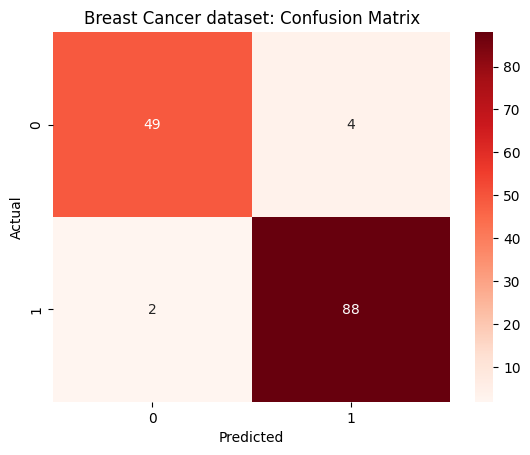

In [22]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Breast Cancer dataset: Confusion Matrix")
plt.show()

In [23]:
importances = pd.Series(
    rf_baseline.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)

,0
worst area,0.149674
worst concave points,0.127189
mean concave points,0.104650
worst radius,0.086963
worst perimeter,0.080299
mean perimeter,0.080037
mean concavity,0.055420
mean radius,0.053665
mean area,0.044062
area error,0.024557


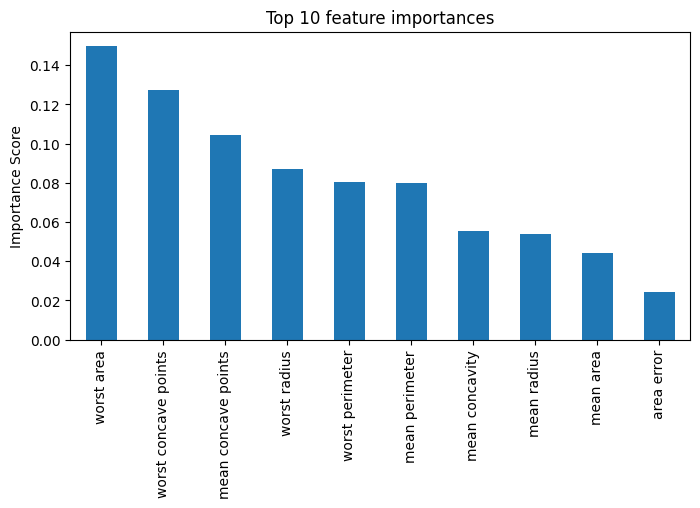

In [25]:
plt.figure(figsize=(8,4))
importances.head(10).plot(kind="bar")
plt.title("Top 10 feature importances")
plt.ylabel("Importance Score")
plt.show()

In [30]:
param_grid = {
    "n_estimators": [100,150,175,200],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 3, 5],
    "max_features":["sqrt", "log2"]
}

In [31]:
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring = "f1",
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 150, 175, 200]},
             scoring='f1')

In [32]:
print("Best parameters found: ")
print(grid_rf.best_params_)

best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test)
print("Classification report: ")
print(classification_report(y_test, y_pred))

Best parameters found: 
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 100}
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        53
           1       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

